In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Pretrained**

In [2]:
from gensim.models import KeyedVectors
WORD2VEC_MODEL = '/content/drive/MyDrive/Sunjare CSE499/Copy of GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(WORD2VEC_MODEL, binary=True)

##**Importing Libraries**


In [78]:
!pip install keras_preprocessing
from keras.layers.core import Dense, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Embedding, Flatten, Activation
from keras.layers.pooling import GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.initializers import Constant
from keras.utils import np_utils
from keras.initializers import Constant
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
import nltk
import numpy as np
import codecs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [80]:

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))
not_stopwords = {'not','no'} 
final_stop_words= set([word for word in stop_words if word not in not_stopwords])

In [81]:
np.random.seed(42)

train_review = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/1/train_reviews.txt'
train_sentiment = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/1/train_sentiments.txt'

test_review = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/1/test_reviews.txt'
test_sentiment = '/content/drive/MyDrive/Sunjare CSE499/Dataset/SST2/1/test_sentiments.txt'




VOCAB_SIZE = 15000
EMBED_SIZE = 300
NUM_FILTERS = 256
NUM_WORDS = 3
BATCH_SIZE = 16 #16
NUM_EPOCHS = 40


##**Dataset Preparation and Cleaning**

In [82]:
counter = collections.Counter()
maxlen = 0
train_xs_word2vec, train_ys_word2vec = [], []


train_fin_review = codecs.open(train_review, "r", encoding='utf-8')
for line in train_fin_review:
    sent = line #Stripping the dataset based on tab. That is stripping label from sentence

    print("Sentence: ",sent)

    words = [x.lower() for x in nltk.word_tokenize(sent)] #lowering the sentence and tokenizing
    print("Actual:")
    print(words)

    wordsExcludingPunctuationMarks=[word for word in words if word.isalnum()]
    print("Truncating punctuation:")
    print(wordsExcludingPunctuationMarks)

    wordsExcludingStopWords = [word for word in wordsExcludingPunctuationMarks if word not in final_stop_words]
    print("Truncating StopWords:")
    print(wordsExcludingStopWords)




    afterLemmatizing = [lemmatizer.lemmatize(token) for token in wordsExcludingStopWords]
    afterLemmatizing = [lemmatizer.lemmatize(token, "v") for token in afterLemmatizing]
    print("After Lemmatizing:")
    print(afterLemmatizing)



    if len(afterLemmatizing) > maxlen: #For calculating the maximum number of words in a sentence
        maxlen = len(afterLemmatizing) 
    for afterLemmitize in afterLemmatizing:
        counter[afterLemmitize] += 1 #Putting the frequency of each  word in a dictionary
    print("***************************************************************************************")

    train_xs_word2vec.append(afterLemmatizing )

train_fin_review.close()



Sentence:  sandra bullock and hugh grant make a great team , but this predictable romantic comedy should get a pink slip .

Actual:
['sandra', 'bullock', 'and', 'hugh', 'grant', 'make', 'a', 'great', 'team', ',', 'but', 'this', 'predictable', 'romantic', 'comedy', 'should', 'get', 'a', 'pink', 'slip', '.']
Truncating punctuation:
['sandra', 'bullock', 'and', 'hugh', 'grant', 'make', 'a', 'great', 'team', 'but', 'this', 'predictable', 'romantic', 'comedy', 'should', 'get', 'a', 'pink', 'slip']
Truncating StopWords:
['sandra', 'bullock', 'hugh', 'grant', 'make', 'great', 'team', 'predictable', 'romantic', 'comedy', 'get', 'pink', 'slip']
After Lemmatizing:
['sandra', 'bullock', 'hugh', 'grant', 'make', 'great', 'team', 'predictable', 'romantic', 'comedy', 'get', 'pink', 'slip']
***************************************************************************************
Sentence:  this is cruel , misanthropic stuff with only weak claims to surrealism and black comedy .

Actual:
['this', 'is', 

In [83]:
train_fin_sentiment = codecs.open(train_sentiment, "r", encoding='utf-8')

for line in train_fin_sentiment:
  train_ys_word2vec.append(int(line))
  
train_fin_sentiment.close()

train_ys_word2vec

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [84]:
train_xs_word2vec
print(len(train_xs_word2vec))

400


In [85]:
print("Maximum number of word in a sentence: ",maxlen)
print("Frequency of each words: ")
counter

Maximum number of word in a sentence:  24
Frequency of each words: 


Counter({'sandra': 1,
         'bullock': 1,
         'hugh': 1,
         'grant': 2,
         'make': 22,
         'great': 5,
         'team': 3,
         'predictable': 4,
         'romantic': 3,
         'comedy': 17,
         'get': 9,
         'pink': 1,
         'slip': 1,
         'cruel': 1,
         'misanthropic': 1,
         'stuff': 4,
         'weak': 1,
         'claim': 1,
         'surrealism': 1,
         'black': 5,
         'chicken': 1,
         'heart': 10,
         'crush': 1,
         'go': 14,
         'absurd': 1,
         'length': 2,
         'duck': 1,
         'issue': 2,
         'raise': 1,
         'straight': 2,
         'video': 4,
         'stitch': 2,
         'bad': 4,
         'mannered': 1,
         'ugly': 2,
         'destructive': 1,
         'little': 12,
         'movie': 52,
         'feel': 11,
         'together': 3,
         'stock': 1,
         'situation': 3,
         'character': 15,
         'seemingly': 1,
         'disgust': 1,
   

##**Generating Word2index**

In [86]:
word2index = collections.defaultdict(int) 
for wid, word in enumerate(counter.most_common(VOCAB_SIZE)):
    word2index[word[0]] = wid + 1

word2index  

defaultdict(int,
            {'film': 1,
             'movie': 2,
             'one': 3,
             'make': 4,
             'story': 5,
             'not': 6,
             'comedy': 7,
             'character': 8,
             'something': 9,
             'like': 10,
             'go': 11,
             'director': 12,
             'way': 13,
             'year': 14,
             'no': 15,
             'work': 16,
             'performance': 17,
             'little': 18,
             'would': 19,
             'feel': 20,
             'heart': 21,
             'look': 22,
             'good': 23,
             'drama': 24,
             'see': 25,
             'even': 26,
             'time': 27,
             'find': 28,
             'get': 29,
             'another': 30,
             'scene': 31,
             'u': 32,
             'give': 33,
             'every': 34,
             'enough': 35,
             'love': 36,
             'life': 37,
             'interest': 38,
             

In [87]:
vocab_sz = len(word2index) + 1
print("Number of Vocabularies: ",vocab_sz)

Number of Vocabularies:  2017


In [88]:
train_xs, train_ys = [], []
test_xs, test_ys = [], []

train_fin_review = codecs.open(train_review, "r", encoding='utf-8')
for line in train_fin_review:
    sent = line #Stripping the dataset based on tab. That is stripping label from sentence

    words = [x.lower() for x in nltk.word_tokenize(sent)] #lowering the sentence and tokenizing
    wordsExcludingPunctuationMarks=[word for word in words if word.isalnum()]
    wordsExcludingStopWords = [word for word in wordsExcludingPunctuationMarks if word not in final_stop_words]

    # afterLemmatizing = [lemmatizer.lemmatize(token) for token in wordsExcludingStopWords]
    # afterLemmatizing = [lemmatizer.lemmatize(token, "v") for token in afterLemmatizing]

    wids = [word2index[word] for word in wordsExcludingStopWords]
    train_xs.append(wids)

train_ys = train_ys_word2vec
train_fin_review.close()



#For Validation
test_fin_review = codecs.open(test_review, "r", encoding='utf-8')
for line in test_fin_review:
    sent = line #Stripping the dataset based on tab. That is stripping label from sentence

    words = [x.lower() for x in nltk.word_tokenize(sent)] #lowering the sentence and tokenizing
    wordsExcludingPunctuationMarks=[word for word in words if word.isalnum()]
    wordsExcludingStopWords = [word for word in wordsExcludingPunctuationMarks if word not in final_stop_words]

    # afterLemmatizing = [lemmatizer.lemmatize(token) for token in wordsExcludingStopWords]
    # afterLemmatizing = [lemmatizer.lemmatize(token, "v") for token in afterLemmatizing]

    wids = [word2index[word] for word in wordsExcludingStopWords]
    test_xs.append(wids)

test_fin_review.close()



#For Validation
test_fin_sentiment = codecs.open(test_sentiment, "r", encoding='utf-8')

for line in test_fin_sentiment:
  test_ys.append(int(line))
  
test_fin_sentiment.close()

test_ys

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [89]:
for i in range(len(train_xs)):
  print(train_xs_word2vec[i])
  print(train_xs[i])


['sandra', 'bullock', 'hugh', 'grant', 'make', 'great', 'team', 'predictable', 'romantic', 'comedy', 'get', 'pink', 'slip']
[626, 627, 628, 308, 4, 79, 172, 115, 173, 7, 29, 629, 630]
['cruel', 'misanthropic', 'stuff', 'weak', 'claim', 'surrealism', 'black', 'comedy']
[631, 632, 116, 633, 0, 635, 80, 7]
['chicken', 'heart', 'crush', 'go', 'absurd', 'length', 'duck', 'issue', 'raise']
[636, 21, 637, 0, 638, 0, 639, 0, 0]
['go', 'straight', 'video']
[0, 311, 117]
['stitch', 'bad', 'mannered', 'ugly', 'destructive', 'little']
[312, 118, 641, 313, 642, 18]
['movie', 'feel', 'stitch', 'together', 'stock', 'situation', 'character', 'movie']
[2, 0, 0, 174, 643, 0, 0, 0]
['seemingly', 'disgust', 'lazy', 'material', 'finish', 'product', 'unshapely', 'look', 'director', 'fisher', 'stevens', 'inexplicably', 'dip', 'key', 'moment', 'film', 'wake', 'life', 'water', 'color']
[644, 0, 646, 314, 0, 316, 647, 22, 12, 648, 649, 650, 0, 652, 0, 1, 0, 37, 176, 0]
['string', 'stale', 'gag', 'no', 'good', '

In [90]:
train_ys

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [91]:
Xtrain = pad_sequences(train_xs, maxlen=maxlen)
Ytrain = np_utils.to_categorical(train_ys)

Xtest = pad_sequences(test_xs, maxlen=maxlen)
Ytest = np_utils.to_categorical(test_ys)

In [92]:
Xtrain

array([[   0,    0,    0, ...,   29,  629,  630],
       [   0,    0,    0, ...,  635,   80,    7],
       [   0,    0,    0, ...,  639,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,  625,  261],
       [   0,    0,    0, ...,    0, 2014, 2015],
       [   0,    0,    0, ...,    0, 2016,   94]], dtype=int32)

In [93]:
print(Ytrain[8])

[1. 0.]


#**Word2Vec**

In [94]:
# import gensim
# model=gensim.models.Word2Vec(sentences=train_xs_word2vec,size=300,window=5,min_count=1, sg=0)

In [95]:
# model.train(train_xs_word2vec,epochs=500,total_examples=len(train_xs_word2vec))

In [96]:
# model.wv.most_similar("bad")

In [97]:
# model.wv.most_similar("good")

In [98]:
# vocab=model.wv.vocab
# print("The total number of words are : ",len(vocab))


In [99]:
# vocab=list(vocab.keys())


In [100]:
# for word in vocab:
#   print(word)


In [101]:
# word_vec_dict={}
# for word in vocab:
#   word_vec_dict[word]=model.wv.get_vector(word)
# print("The no of key-value pairs : ",len(word_vec_dict)) 
# print(word_vec_dict.keys())

# print("***")

# res = list(word_vec_dict.values())[0]
# print(str(res))

#**Word Embeddings**

In [102]:
# # now creating the embedding matrix
# embed_dim = 300
# from nltk import word_tokenize,sent_tokenize # tokenizing


# embed_matrix=np.zeros(shape=(vocab_sz,embed_dim))

# print(embed_matrix.shape)

# for word,i in word2index.items():
#   embed_vector=word_vec_dict.get(word)
#   print(str(word) + "***" + str(i))
#   if embed_vector is not None and embed_vector.size!=0:  # word is in the vocabulary learned by the w2v model
#     embed_matrix[i]=embed_vector
#     print("--->"  + str(word) + "***" + str(i))
#     print("\n")
#   # if word is not found then embed_vector corressponding to that vector will stay zero.

#**For Pretrained Word2Vec**





In [103]:
embed_matrix = np.zeros((vocab_sz, EMBED_SIZE))
for word, index in word2index.items():
    try:
        embed_matrix[index, :] = word2vec[word]
    except KeyError:
        pass

#**Test Train Split**

In [104]:
print(Xtrain.shape)
print(Ytrain.shape)


(400, 24)
(400, 2)


In [105]:
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(400, 24) (100, 24) (400, 2) (100, 2)


#**Learning Rate Range Finder**

In [106]:
# Github Link: https://gist.github.com/WittmannF/c55ed82d27248d18799e2be324a79473
from keras.callbacks import Callback
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.ndimage.filters import gaussian_filter1d

class LRFinder(Callback):
    """
    Up-to date version: https://github.com/WittmannF/LRFinder
    """
    def __init__(self, min_lr, max_lr, mom=0.9, stop_multiplier=None, 
                 reload_weights=True, batches_lr_update=5):
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.mom = mom
        self.reload_weights = reload_weights
        self.batches_lr_update = batches_lr_update
        if stop_multiplier is None:
            self.stop_multiplier = -20*self.mom/3 + 10 # 4 if mom=0.9
                                                       # 10 if mom=0
        else:
            self.stop_multiplier = stop_multiplier
        
    def on_train_begin(self, logs={}):
        p = self.params
        try:
            n_iterations = p['epochs']*p['samples']//p['batch_size']
        except:
            n_iterations = p['steps']*p['epochs']
            
        self.learning_rates = np.geomspace(self.min_lr, self.max_lr, \
                                           num=n_iterations//self.batches_lr_update+1)
        self.losses=[]
        self.iteration=0
        self.best_loss=0
        
        self.per_epoch_loss = []
        

        if self.reload_weights:
            self.model.save_weights('tmp.hdf5')
        




    def get_percentage_diff(previous, current):
      try:
          percentage = abs(previous - current)/max(previous, current) * 100
      except ZeroDivisionError:
          percentage = float('inf')
      return percentage    

    
    def on_batch_end(self, batch, logs={}):
        loss = logs.get('loss')
        if self.iteration!=0: # Make loss smoother using momentum
            loss = self.losses[-1]*self.mom+loss*(1-self.mom)
        
        if self.iteration==0 or loss < self.best_loss: 
                self.best_loss = loss
                
        if self.iteration%self.batches_lr_update==0: # Evaluate each lr over 5 epochs
            
            if self.reload_weights:
                self.model.load_weights('tmp.hdf5')
          
            lr = self.learning_rates[self.iteration//self.batches_lr_update]            
            K.set_value(self.model.optimizer.lr, lr)

            self.losses.append(loss) 
                     

        if loss > self.best_loss*self.stop_multiplier: # Stop criteria
            self.model.stop_training = True
        
        self.iteration += 1


    def on_epoch_end(self, epoch, logs=None):
      
          loss = logs.get('loss') * 100.0

          if len(self.per_epoch_loss)>0:
            previous_minimum_loss = min(self.per_epoch_loss)

          self.per_epoch_loss.append(loss)
          

          if epoch>0:
            print("\n *** Epoch " + str(epoch) + " Completed ***")
            print("Present loss in epoch "+str(epoch)  +": "+ str(loss))
            print("Minimum Loss: " + str(min(self.per_epoch_loss)))


            percentage_icrease = abs(previous_minimum_loss - loss)/max(previous_minimum_loss, loss) * 100
            if loss > previous_minimum_loss:
              print("Loss Increased By: " + str(percentage_icrease))  

              if percentage_icrease>3.0 and epoch>10:
                print("\n Alret!!! Loss Increasing, Model Will Stop Now \n")
                # self.model.stop_training = True

            else:
              print("Loss Decresed By: " + str(percentage_icrease))
              
        
          else:
            print("\n *** Epoch " + str(epoch) + " Completed ***")

          





    
    def on_train_end(self, logs=None):
        if self.reload_weights:
                self.model.load_weights('tmp.hdf5')

        
        minpos = self.losses.index(min(self.losses))
        global_minima = self.learning_rates[:len(self.losses)][minpos]
        print("Global minima from list:",global_minima)



        fig = plt.figure(figsize=(8, 6))
        


        # plt.plot(self.learning_rates[:len(self.losses)],self.losses,color="orange",label="Loss vs LR")
        plt.xlabel("Learning Rate")
        plt.ylabel("Loss")


        ysmoothed = gaussian_filter1d(self.losses, sigma=3)
        minpos_graph = np.argmin(ysmoothed)
        plt.plot(self.learning_rates[:len(self.losses)], ysmoothed)
        plt.plot(self.learning_rates[:len(self.losses)][minpos_graph], self.losses[minpos_graph], 'go', label="Minima")


        draw_polynomial = np.poly1d(np.polyfit(self.learning_rates[:len(self.losses)], ysmoothed, 15))
        polyline = np.linspace(self.min_lr, max(self.learning_rates[:len(self.losses)]), 300)
        plt.plot(polyline, draw_polynomial(polyline), color='purple')
        # plt.plot(self.learning_rates[:len(self.losses)][minpos], min(self.losses), 'ro', label="Minima")
 


        roots = [np.real(z) for z in draw_polynomial.deriv().roots 
                if np.imag(z)==0 and self.min_lr<=np.real(z)<=max(self.learning_rates[:len(self.losses)])]

        
        roots.sort()
        minimum_roots = []

        for root in roots:
          second_derivative = draw_polynomial.deriv(2)(root)
          if second_derivative>0:
            print("its minimum: ",root)
            # it's a minimum 
            minimum_roots.append((draw_polynomial(root),root)) 
            

          elif second_derivative<0:
            print("its maximum: ", root)
            
            # it's a maximum
          else:
            print("its point of flexure: ",root)
            # it's a point of flexure


        
        # Sort the list of tuples by the first element of each tuple
        minimum_loss_of_polyfit = sorted(minimum_roots)
        root = minimum_loss_of_polyfit[0][1] 
        f = open("global_minima.txt", "a")
        f.truncate(0)
        f.write(str(root))
        f.close()

        plt.plot([root,root],[draw_polynomial(root),draw_polynomial(root) + 0.01], 'r--')
        base_lr = (70.0 * root) / 100.0
        plt.plot([base_lr ,base_lr ],[draw_polynomial(root),draw_polynomial(root) + 0.01], 'r--')

        plt.xscale('log')
        fig.savefig('Loss vs Learning rate', dpi=500)
        plt.show()












#         # Github Link: https://gist.github.com/WittmannF/c55ed82d27248d18799e2be324a79473
# from keras.callbacks import Callback
# import keras.backend as K
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import optimize
# from scipy.ndimage.filters import gaussian_filter1d

# class LRFinder(Callback):
#     """
#     Up-to date version: https://github.com/WittmannF/LRFinder
#     """
#     def __init__(self, min_lr, max_lr, mom=0.9, stop_multiplier=None, 
#                  reload_weights=True, batches_lr_update=5):
#         self.min_lr = min_lr
#         self.max_lr = max_lr
#         self.mom = mom
#         self.reload_weights = reload_weights
#         self.batches_lr_update = batches_lr_update
#         if stop_multiplier is None:
#             self.stop_multiplier = -20*self.mom/3 + 10 # 4 if mom=0.9
#                                                        # 10 if mom=0
#         else:
#             self.stop_multiplier = stop_multiplier
        
#     def on_train_begin(self, logs={}):
#         p = self.params
#         try:
#             n_iterations = p['epochs']*p['samples']//p['batch_size']
#         except:
#             n_iterations = p['steps']*p['epochs']
            
#         self.learning_rates = np.geomspace(self.min_lr, self.max_lr, \
#                                            num=n_iterations//self.batches_lr_update+1)
#         self.losses=[]
#         self.iteration=0
#         self.best_loss=0
#         if self.reload_weights:
#             self.model.save_weights('tmp.hdf5')
        
    
#     def on_batch_end(self, batch, logs={}):
#         loss = logs.get('loss')
        
#         if self.iteration!=0: # Make loss smoother using momentum
#             loss = self.losses[-1]*self.mom+loss*(1-self.mom)
        
#         if self.iteration==0 or loss < self.best_loss: 
#                 self.best_loss = loss
                
#         if self.iteration%self.batches_lr_update==0: # Evaluate each lr over 5 epochs
            
#             if self.reload_weights:
#                 self.model.load_weights('tmp.hdf5')
          
#             lr = self.learning_rates[self.iteration//self.batches_lr_update]            
#             K.set_value(self.model.optimizer.lr, lr)

#             self.losses.append(loss)            

#         if loss > self.best_loss*self.stop_multiplier: # Stop criteria
#             self.model.stop_training = True
                
#         self.iteration += 1


    
#     def on_train_end(self, logs=None):
#         if self.reload_weights:
#                 self.model.load_weights('tmp.hdf5')

        
#         minpos = self.losses.index(min(self.losses))
#         global_minima = self.learning_rates[:len(self.losses)][minpos]
#         print("Global minima from list:",global_minima)



#         plt.figure(figsize=(20, 6))


#         plt.plot(self.learning_rates[:len(self.losses)],self.losses,color="orange",label="Loss vs LR")
#         plt.plot(self.learning_rates[:len(self.losses)][minpos], min(self.losses), 'ro', label="Minima")
#         plt.xlabel("Learning Rate")
#         plt.ylabel("Loss")


#         plt.xscale('log')
#         plt.show()

#         f = open("global_minima.txt", "a")
#         f.truncate(0)
#         f.write(str(global_minima))
#         f.close()


<ipython-input-106-c71309d06d4f>:7: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [107]:
# lr_finder = LRFinder(min_lr=0.000001, max_lr=0.00001) #Low Learning Rate
lr_finder = LRFinder(min_lr=0.00001, max_lr=0.001)     #Medium Learning Rate
# lr_finder = LRFinder(min_lr=0.001, max_lr=0.1)         #High Learning Rate

#**Learning Rate Scheduler**

In [108]:
from keras.callbacks import LearningRateScheduler
lr_sched = LearningRateScheduler(lambda epoch: 1e-4 * (0.90 ** np.floor(epoch / 2)))

#**EarlyStopping**

In [109]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=25,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [110]:
import os
import random as rn 
import tensorflow as tf

def reproduceResult():
  seed_value= 0

  
  with tf.device("/cpu:0"):
    ...


  os.environ['PYTHONHASHSEED']=str(seed_value)
  np.random.seed(0)
  rn.seed(0)


  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, 
                                          inter_op_parallelism_threads=1)


  tf.compat.v1.set_random_seed(seed_value)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
  tf.compat.v1.keras.backend.clear_session()

reproduceResult()

#**Attention Layer**

In [111]:
!pip install keras_self_attention
import keras
from keras_self_attention import SeqSelfAttention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Bi-LSTM**

In [112]:
from keras.layers import Bidirectional

modelBiLstm=Sequential()
modelBiLstm.add(Embedding(vocab_sz, EMBED_SIZE, input_length=maxlen, embeddings_initializer=Constant(embed_matrix)))
modelBiLstm.add(Bidirectional(LSTM(256,return_sequences=True)))
modelBiLstm.add(SeqSelfAttention(attention_activation='relu'))
modelBiLstm.add(Dropout(0.2))
modelBiLstm.add(Bidirectional(LSTM(128)))
modelBiLstm.add(Dropout(0.2))
modelBiLstm.add(Dense(128,activation='relu'))
modelBiLstm.add(Dropout(0.2))
modelBiLstm.add(Dense(256,activation='relu'))
modelBiLstm.add(Dropout(0.2))
modelBiLstm.add(Dense(512,activation='relu'))
modelBiLstm.add(Dropout(0.2))
modelBiLstm.add(BatchNormalization())
modelBiLstm.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [113]:
import tensorflow as tf

modelBiLstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# modelHybrid.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

print(modelBiLstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 300)           605100    
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          1140736   
 l)                                                              
                                                                 
 seq_self_attention (SeqSelf  (None, 24, 512)          32833     
 Attention)                                                      
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                        

Epoch 1/40
24/25 [===========================>..] - ETA: 0s - loss: 0.7371 - accuracy: 0.4974
 *** Epoch 0 Completed ***
25/25 [==============================] - 24s 436ms/step - loss: 0.7393 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 2/40
24/25 [===========================>..] - ETA: 0s - loss: 0.7455 - accuracy: 0.4922
 *** Epoch 1 Completed ***
Present loss in epoch 1: 74.92221593856812
Minimum Loss: 73.92513155937195
Loss Increased By: 1.3308260663482225
25/25 [==============================] - 8s 282ms/step - loss: 0.7492 - accuracy: 0.4825 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/40
24/25 [===========================>..] - ETA: 0s - loss: 0.7375 - accuracy: 0.4714
 *** Epoch 2 Completed ***
Present loss in epoch 2: 73.34867119789124
Minimum Loss: 73.34867119789124
Loss Decresed By: 0.7797894292791846
25/25 [==============================] - 4s 162ms/step - loss: 0.7335 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5300
Epoch 4/40
25/25 [

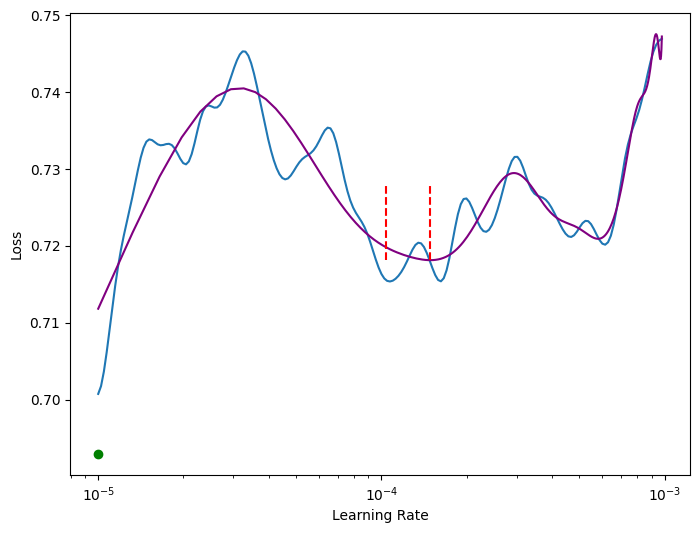

In [114]:
history = modelBiLstm.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest), callbacks=[lr_finder])

#**CyclicLearningRate Scheduler**

In [115]:
# Github link: https://github.com/bckenstler/CLR
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import numpy as np

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr, max_lr, step_size, mode,
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

In [116]:
with open('/content/global_minima.txt', 'r') as file:
    global_minima = file.read()

global_minima = float(global_minima)
global_minima

0.00014877404885187443

In [117]:
clr_step_size = int(4 * (len(Xtrain)/BATCH_SIZE))
base_lr = (70.0 * global_minima) / 100.0
max_lr = global_minima 
mode='exp_range'

In [118]:
clr = CyclicLR(base_lr=base_lr, max_lr=max_lr, step_size=clr_step_size, mode=mode)

In [119]:
# history = modelBiLstm.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest), callbacks=[early_stopping])
history = modelBiLstm.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest), callbacks=[clr, early_stopping])

Epoch 1/40
25/25 [==============================] - 1s 25ms/step - loss: 0.7425 - accuracy: 0.5075 - val_loss: 0.6930 - val_accuracy: 0.5900
Epoch 2/40
25/25 [==============================] - 1s 22ms/step - loss: 0.7099 - accuracy: 0.5425 - val_loss: 0.6928 - val_accuracy: 0.5500
Epoch 3/40
25/25 [==============================] - 0s 17ms/step - loss: 0.6965 - accuracy: 0.5700 - val_loss: 0.6928 - val_accuracy: 0.5500
Epoch 4/40
25/25 [==============================] - 0s 16ms/step - loss: 0.6566 - accuracy: 0.6275 - val_loss: 0.6904 - val_accuracy: 0.5500
Epoch 5/40
25/25 [==============================] - 0s 15ms/step - loss: 0.5942 - accuracy: 0.7000 - val_loss: 0.6828 - val_accuracy: 0.5900
Epoch 6/40
25/25 [==============================] - 0s 16ms/step - loss: 0.4166 - accuracy: 0.8300 - val_loss: 0.6617 - val_accuracy: 0.6300
Epoch 7/40
25/25 [==============================] - 0s 15ms/step - loss: 0.3012 - accuracy: 0.8775 - val_loss: 0.6691 - val_accuracy: 0.6000
Epoch 8/40
25

In [120]:
y_pred=np.argmax(modelBiLstm.predict(Xtest), axis=-1)
y_pred

4/4 [==============================] - 1s 7ms/step


array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [121]:
Ytest

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [122]:
y_test=np.argmax(Ytest, axis=1)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [123]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy:  0.61
[[36 14]
 [25 25]]


In [124]:
from sklearn.metrics import f1_score, recall_score, precision_score
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Recall: ", recall)    # negative predictions made are correct
print("Precision: ", precision) # positive predictions made are correct
print("F1 Score: ",f1)

Recall:  0.5
Precision:  0.6410256410256411
F1 Score:  0.5617977528089888


#**Graph**

In [125]:
import pandas as pd
def plot_results(H):
    results = pd.DataFrame({"Train Loss": H.history['loss'], "Validation Loss": H.history['val_loss'],
              "Train Accuracy": H.history['accuracy'], "Validation Accuracy": H.history['val_accuracy']
             })
    fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
    results[["Train Loss", "Validation Loss"]].plot(ax=ax[0])
    results[["Train Accuracy", "Validation Accuracy"]].plot(ax=ax[1])

    
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")

    ax[1].set_ylabel("Accuracy")
    ax[1].set_xlabel("Epoch")
    plt.show()

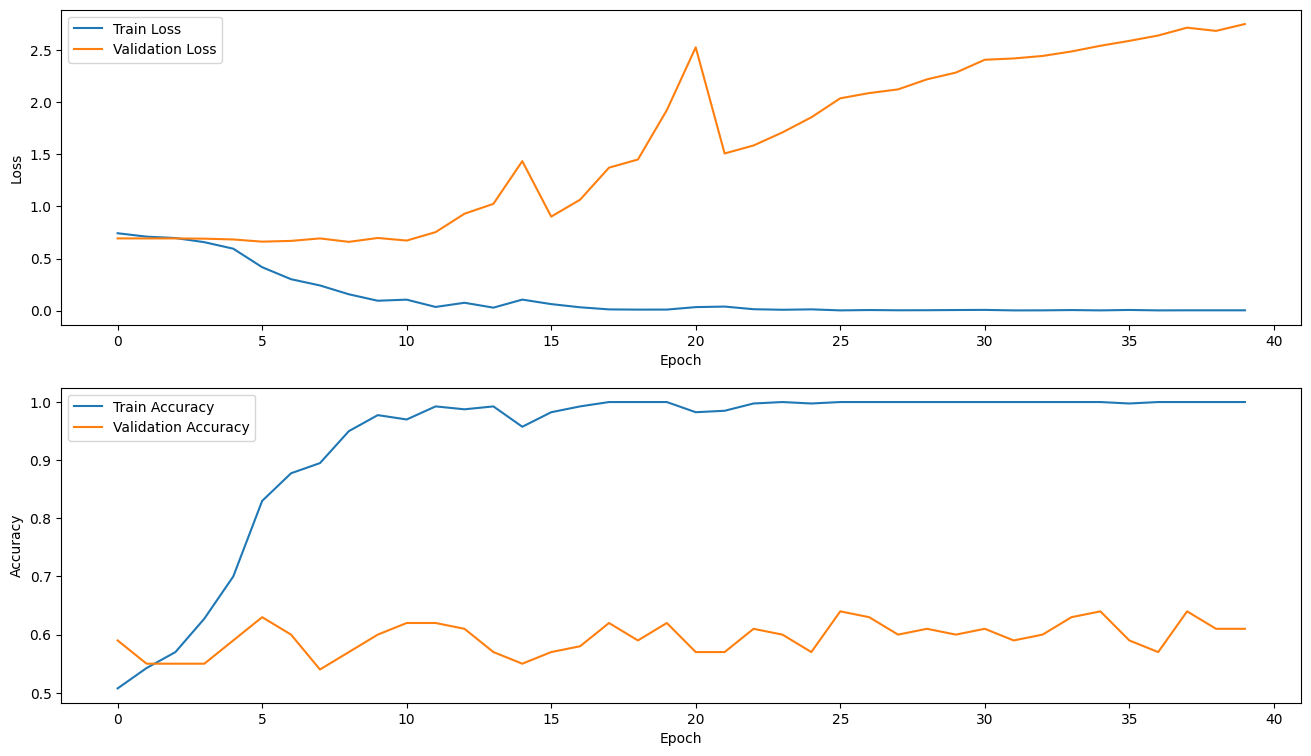

In [126]:
plot_results(history)

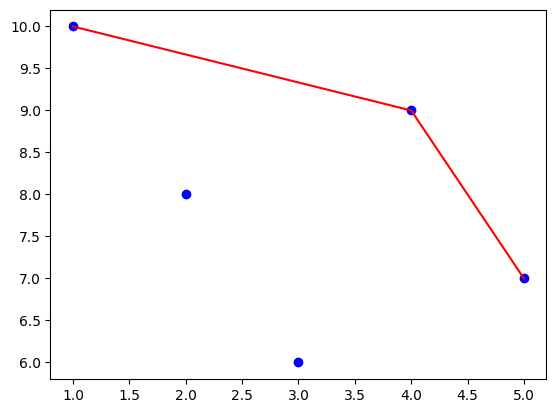

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Define some example data
data = {'x': [1, 2, 3, 4, 5], 'y': [10, 8, 6, 9, 7]}

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

# Calculate the Pareto frontier
df['cummax'] = df['y'][::-1].cummax()[::-1]
pareto_mask = df['y'] >= df['cummax']
pareto_points = df[pareto_mask]

# Plot the points and the Pareto frontier
plt.scatter(df['x'], df['y'], color='b')
plt.plot(pareto_points['x'], pareto_points['y'], color='r')
plt.show()
